# Herron Topic 1 - Practice (Section 3, Monday 2:45 PM)

## Announcements

- Quiz 2 - mean was $\approx 90%$
- Quiz 3 - due by 11:59 on Friday, 2/10
- Project groups open on Canvas under People - please sign up!
- Optional, anonymous survey on Canvas under "Quizzes" - I value your feedback

## Practice

On Discovery, we need to install the following pacakges every time we log in:

In [1]:
# %pip install yfinance pandas-datareader requests-cache

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import yfinance as yf
import pandas_datareader as pdr
import requests_cache

In [3]:
%config InlineBackend.figure_format = 'retina'
%precision 4
pd.options.display.float_format = '{:.4f}'.format
session = requests_cache.CachedSession(expire_after=1)

### Download all available daily price data for tickers TSLA, F, AAPL, AMZN, and META to data frame `histories`

Remove time zone information from the index and use `histories.columns.names` to label the variables and tickers as `Variable` and `Ticker`.

In [4]:
tickers = yf.Tickers('TSLA F AAPL AMZN META', session=session)
histories = tickers.history(period='max', auto_adjust=False, progress=False)
histories.columns.names = ['Variable', 'Ticker']
histories.index = histories.index.tz_localize(None)
histories.head()

Variable   Adj Close                       Close                        ...  \
Ticker          AAPL AMZN      F META TSLA  AAPL AMZN      F META TSLA  ...   
Date                                                                    ...   
1972-06-01       NaN  NaN 0.2515  NaN  NaN   NaN  NaN 2.1532  NaN  NaN  ...   
1972-06-02       NaN  NaN 0.2510  NaN  NaN   NaN  NaN 2.1492  NaN  NaN  ...   
1972-06-05       NaN  NaN 0.2510  NaN  NaN   NaN  NaN 2.1492  NaN  NaN  ...   
1972-06-06       NaN  NaN 0.2481  NaN  NaN   NaN  NaN 2.1248  NaN  NaN  ...   
1972-06-07       NaN  NaN 0.2467  NaN  NaN   NaN  NaN 2.1127  NaN  NaN  ...   

Variable   Stock Splits                       Volume                          
Ticker             AAPL AMZN      F META TSLA   AAPL AMZN        F META TSLA  
Date                                                                          
1972-06-01          NaN  NaN 0.0000  NaN  NaN    NaN  NaN  1091238  NaN  NaN  
1972-06-02          NaN  NaN 0.0000  NaN  NaN    NaN  NaN  1174468  NaN  NaN  
1972-06-05          NaN  NaN 0.0000  NaN  NaN    NaN  NaN  5209582  NaN  NaN  
1972-06-06          NaN  NaN 0.0000  NaN  NaN    NaN  NaN  1424158  NaN  NaN  
1972-06-07          NaN  NaN 0.0000  NaN  NaN    NaN  NaN   675088  NaN  NaN  

[5 rows x 40 columns]

### Calculate all available daily returns and save to data frame `returns`

***The following code assumes data are chronologically ordered!***
The yfinance package returns sorted data, and we can use `.sort_index()` to sort our data, if necessary.

In [5]:
returns = histories['Adj Close'].pct_change()
returns.head()

Ticker,AAPL,AMZN,F,META,TSLA
Date,,,,,
1972-06-01,NaN,NaN,NaN,NaN,NaN
1972-06-02,NaN,NaN,-0.0019,NaN,NaN
1972-06-05,NaN,NaN,0.0000,NaN,NaN
1972-06-06,NaN,NaN,-0.0113,NaN,NaN
1972-06-07,NaN,NaN,-0.0057,NaN,NaN


### Slices returns for the 2020s and assign to `returns_2020s`

In [6]:
returns_2020s = returns.loc['2020':]
returns_2020s.head()

Ticker,AAPL,AMZN,F,META,TSLA
Date,,,,,
2020-01-02,0.0228,0.0272,0.0129,0.0221,0.0285
2020-01-03,-0.0097,-0.0121,-0.0223,-0.0053,0.0296
2020-01-06,0.0080,0.0149,-0.0054,0.0188,0.0193
2020-01-07,-0.0047,0.0021,0.0098,0.0022,0.0388
2020-01-08,0.0161,-0.0078,0.0000,0.0101,0.0492


### Download all available data for the Fama and French daily benchmark factors to dictionary `ff_all`

I often use the following code snippet to find the exact name for the the daily benchmark factors file.

In [7]:
pdr.famafrench.get_available_datasets()[:5]

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily']

Then I copy-and-paste that file name into `pdr.DataReader()`.

In [8]:
ff_all = pdr.DataReader(
    name='F-F_Research_Data_Factors_daily',
    data_source='famafrench',
    start='1900',
    session=session
)

### Slice the daily benchmark factors, convert them to decimal returns, and assign to `ff`

In [9]:
ff = ff_all[0] / 100
ff.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.0010,-0.0025,-0.0027,0.0001
1926-07-02,0.0045,-0.0033,-0.0006,0.0001
1926-07-06,0.0017,0.0030,-0.0039,0.0001
1926-07-07,0.0009,-0.0058,0.0002,0.0001
1926-07-08,0.0021,-0.0038,0.0019,0.0001


### Use the `.cumprod()` method to plot cumulative returns for these stocks in the 2020s

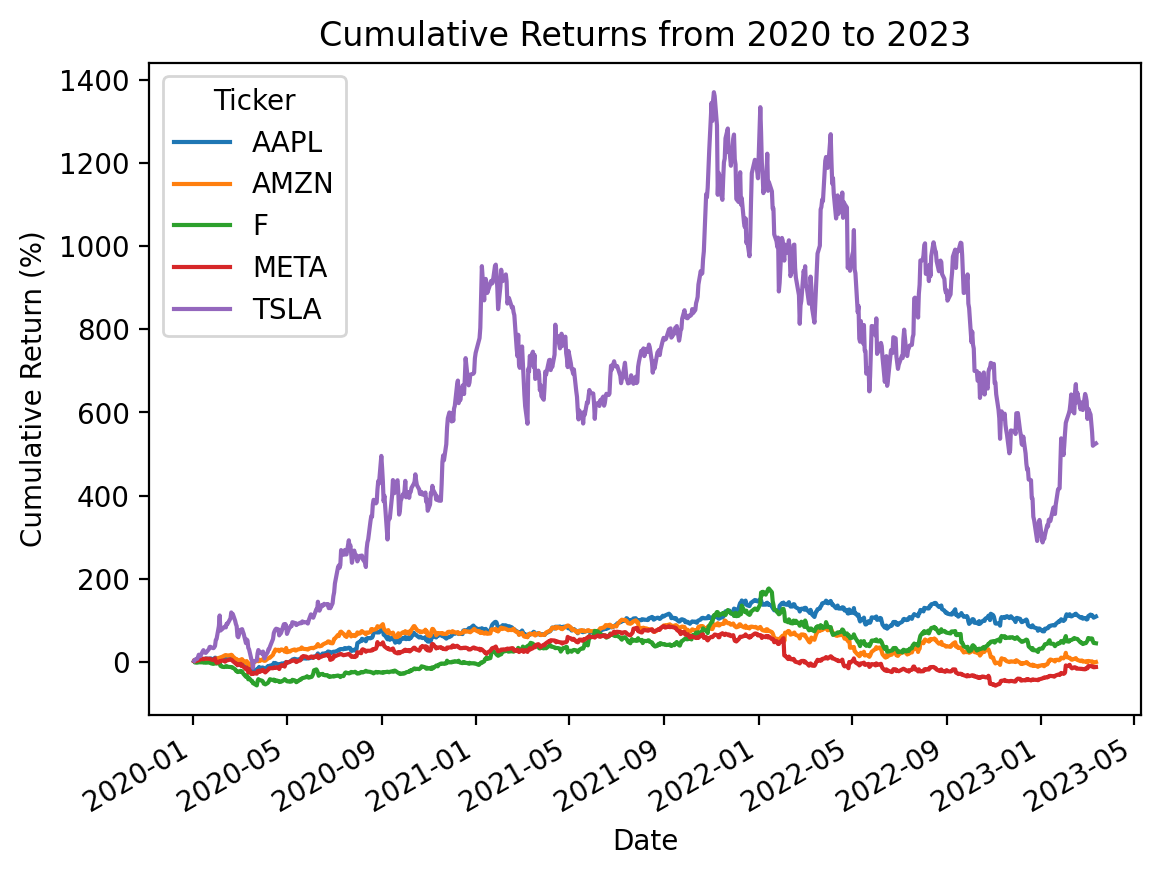

In [10]:
cumprod_solution = returns_2020s.add(1).cumprod().sub(1).mul(100)
cumprod_solution.plot()
plt.ylabel('Cumulative Return (%)')
plt.title(f'Cumulative Returns from {cumprod_solution.index[0]:%Y} to {cumprod_solution.index[-1]:%Y}')
plt.show()

### Use the `.cumsum()` method with log returns to plot cumulative returns for these stocks in the 2020s

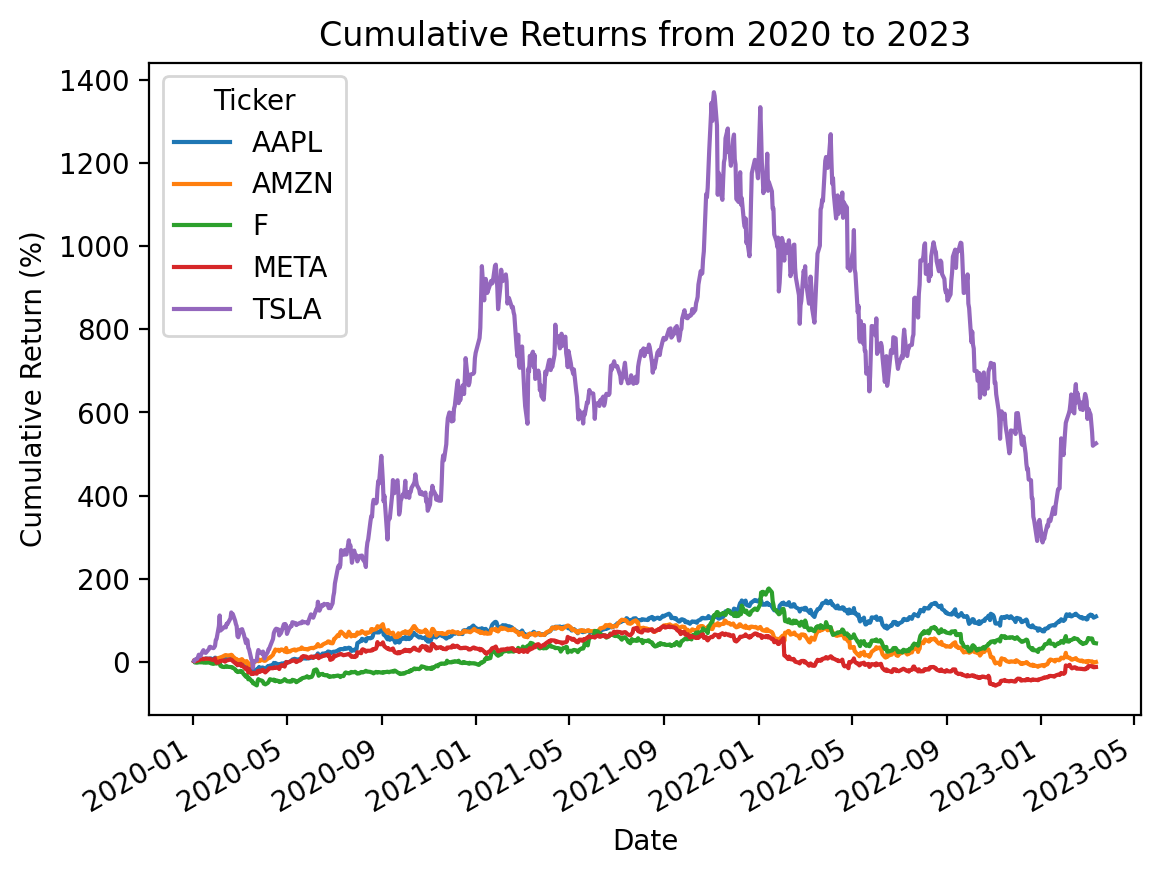

In [11]:
cumsum_solution = returns_2020s.add(1).pipe(np.log).cumsum().pipe(np.exp).sub(1).mul(100)
cumsum_solution.plot()
plt.ylabel('Cumulative Return (%)')
plt.title(f'Cumulative Returns from {cumsum_solution.index[0]:%Y} to {cumsum_solution.index[-1]:%Y}')
plt.show()

The `.cumprod()` and  `.cumsum()` solutions are the same!

In [12]:
np.allclose(cumprod_solution, cumsum_solution)

True

In this case, the `.cumprod()` solution is faster than the `.cumsum()` solution, but summing log returns is typically faster than compounding simple returns.

In [13]:
%timeit returns_2020s.add(1).cumprod().sub(1)

132 µs ± 696 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [14]:
%timeit returns_2020s.add(1).pipe(np.log).cumsum().pipe(np.exp).sub(1)

249 µs ± 3.28 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Use price data only to plot cumulative returns for these stocks in the 2020s

We can also calculate cumulative returns as the ratio of adjusted closed.
That is $R_{0,T} = \frac{AC_T}{AC_0} - 1$.

In [15]:
adjclose_2019_last = histories['Adj Close'].loc['2019'].iloc[-1]
adjclose_2019_last

Ticker
AAPL    71.8109
AMZN    92.3920
F        8.2889
META   205.2500
TSLA    27.8887
Name: 2019-12-31 00:00:00, dtype: float64

In [16]:
adjclose_2020s = histories['Adj Close'].loc['2020':]
adjclose_2020s.head()

Ticker,AAPL,AMZN,F,META,TSLA
Date,,,,,
2020-01-02,73.4494,94.9005,8.3958,209.7800,28.6840
2020-01-03,72.7353,93.7485,8.2086,208.6700,29.5340
2020-01-06,73.3149,95.1440,8.1641,212.6000,30.1027
2020-01-07,72.9701,95.3430,8.2443,213.0600,31.2707
2020-01-08,74.1439,94.5985,8.2443,215.2200,32.8093


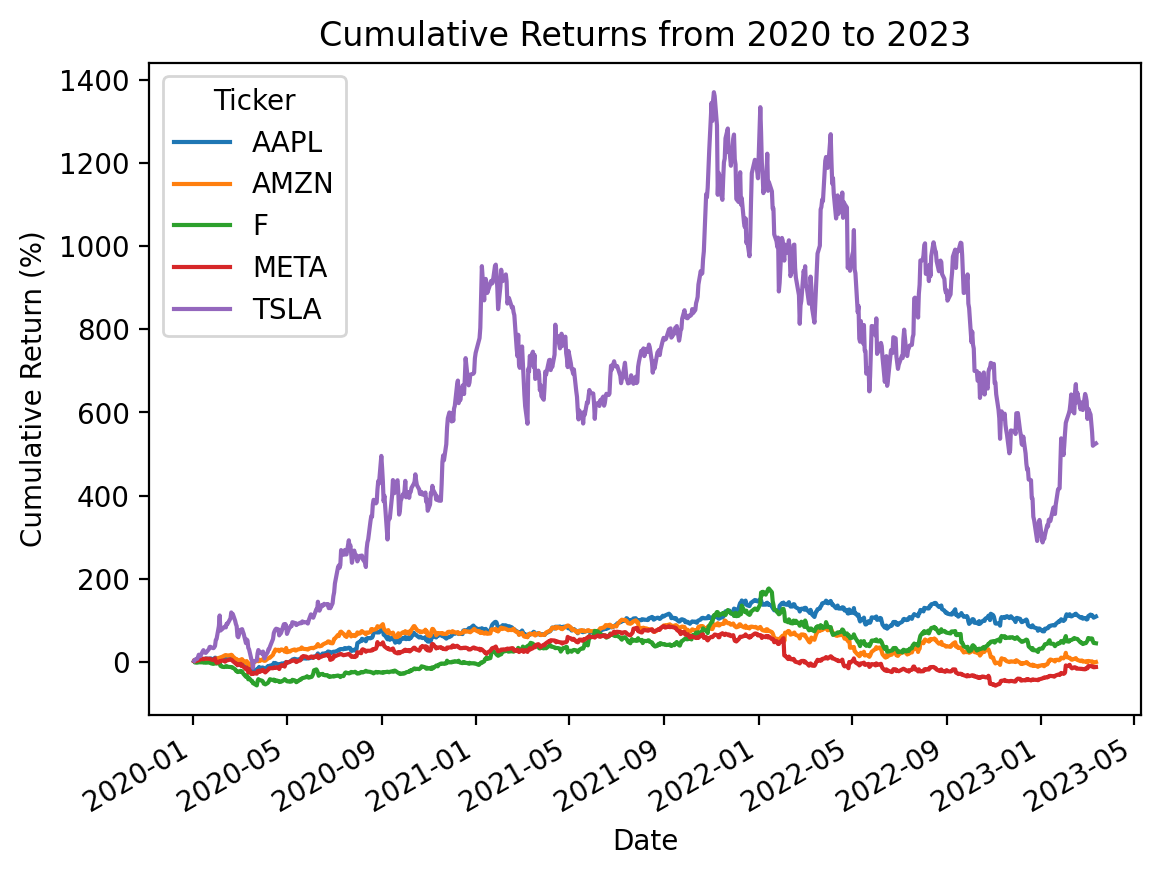

In [17]:
adjclose_solution = adjclose_2020s.div(adjclose_2019_last).sub(1).mul(100)
adjclose_solution.plot()
plt.ylabel('Cumulative Return (%)')
plt.title(f'Cumulative Returns from {cumsum_solution.index[0]:%Y} to {cumsum_solution.index[-1]:%Y}')
plt.show()

This solution is the same as the previous two!

In [18]:
np.allclose(cumprod_solution, adjclose_solution)

True

What should we make of these three options?

1. The `.cumprod()` solution is the most intutive, and I use it most often
1. The `.cumsum()` solution is typically faster than the `.cumprod()` solution, and I use it when I need to calcualate millions of returns
1. The ratio of adjusted closes helps build understanding

### Calculate the Sharpe Ratio for TSLA

Calculate the Sharpe Ratio with all available returns and 2020s returns.
Recall the Sharpe Ratio is $\frac{\overline{R_i - R_f}}{\sigma_i}$, where $\sigma_i$ is the volatility of *excess* returns.

***I suggest you write a function named `sharpe()` to use for the rest of this notebook.***

In [19]:
def sharpe(ri, rf=ff['RF']):
    ri_rf = ri.sub(rf).dropna()
    return np.sqrt(252) * ri_rf.mean() / ri_rf.std()

In [20]:
sharpe(returns_2020s['TSLA'])

1.0386986513828833

We can use the `.pipe()` method to chain the previous calculation.

In [21]:
returns_2020s['TSLA'].pipe(sharpe)

1.0386986513828833

### Calculate the market beta for TSLA

Calculate the market beta with all available returns and 2020s returns.
Recall we estimate market beta with the ordinary least squares (OLS) regression $R_i-R_f = \alpha + \beta (R_m-R_f) + \epsilon$.
We can estimate market beta with the covariance formula (i.e., $\beta_i = \frac{Cov(R_i - R_f, R_m - R_f)}{Var(R_m-R_f)}$) for a univariate regression if we do not need goodness of fit statistics.

***I suggest you write a function named `beta()` to use for the rest of this notebook.***

In [22]:
def beta(ri, rf=ff['RF'], rm_rf=ff['Mkt-RF']):
    ri_rf = ri.sub(rf).dropna()
    rm_rf = rm_rf.loc[ri_rf.index] # use same peiod for stock and market
    return ri_rf.cov(rm_rf) / rm_rf.var()

In [23]:
beta(returns_2020s['TSLA'])

1.5195611279688725

Again, we can `.pipe()` this calculation.

In [24]:
returns_2020s['TSLA'].pipe(beta)

1.5195611279688725

### Guess the Sharpe Ratios for these stocks in the 2020s

### Guess the market betas for these stocks in the 2020s

### Calculate the Sharpe Ratios for these stocks in the 2020s

We can loop over `returns_2020s`, but a loop solution is tedious.

In [25]:
for i in returns_2020s:
    sharpe_i = sharpe(returns_2020s[i])
    print(f'Sharpe Ratio for {i}:\t {sharpe_i:0.2f}')

Sharpe Ratio for AAPL:	 0.70
Sharpe Ratio for AMZN:	 0.10
Sharpe Ratio for F:	 0.42
Sharpe Ratio for META:	 -0.13
Sharpe Ratio for TSLA:	 1.04


We can also use pandas notation to vectorize this calculation.
First calculate *excess* returns as $R_i - R_f$.

In [26]:
returns_2020s_excess = returns_2020s.sub(ff['RF'], axis=0).dropna()
returns_2020s_excess.head()

Ticker,AAPL,AMZN,F,META,TSLA
Date,,,,,
2020-01-02,0.0228,0.0271,0.0128,0.0220,0.0285
2020-01-03,-0.0098,-0.0122,-0.0224,-0.0054,0.0296
2020-01-06,0.0079,0.0148,-0.0055,0.0188,0.0192
2020-01-07,-0.0048,0.0020,0.0098,0.0021,0.0387
2020-01-08,0.0160,-0.0079,-0.0001,0.0101,0.0491


Then use pandas notation to calculate means, standard deviations, and annualize.

In [27]:
(
    returns_2020s_excess.mean()
    .div(returns_2020s_excess.std())
    .mul(np.sqrt(252))
)

Ticker
AAPL    0.7019
AMZN    0.0985
F       0.4199
META   -0.1257
TSLA    1.0387
dtype: float64

***Note:***
In a few weeks we will learn the `.apply()` method, which avoids the loop syntax.

In [28]:
returns_2020s.apply(sharpe)

Ticker
AAPL    0.7019
AMZN    0.0985
F       0.4199
META   -0.1257
TSLA    1.0387
dtype: float64

### Calculate the market betas for these stocks in the 2020s

We can loop over `returns_2020s`, but a loop solution is tedious.

In [29]:
for i in returns_2020s:
    beta_i = beta(returns_2020s[i])
    print(f'Beta for {i}:\t {beta_i:0.2f}')

Beta for AAPL:	 1.16
Beta for AMZN:	 1.00
Beta for F:	 1.21
Beta for META:	 1.23
Beta for TSLA:	 1.52


Or we can follow out approach above to vectorize this calculation.
First, we need to add a market excess return column to `returns_2020s_excess`.

In [30]:
returns_2020s_excess['Mkt-RF'] = ff['Mkt-RF']
returns_2020s_excess.head()

Ticker,AAPL,AMZN,F,META,TSLA,Mkt-RF
Date,,,,,,
2020-01-02,0.0228,0.0271,0.0128,0.0220,0.0285,0.0086
2020-01-03,-0.0098,-0.0122,-0.0224,-0.0054,0.0296,-0.0067
2020-01-06,0.0079,0.0148,-0.0055,0.0188,0.0192,0.0036
2020-01-07,-0.0048,0.0020,0.0098,0.0021,0.0387,-0.0019
2020-01-08,0.0160,-0.0079,-0.0001,0.0101,0.0491,0.0047


In [31]:
vcv = returns_2020s_excess.cov()
vcv.head()

Ticker,AAPL,AMZN,F,META,TSLA,Mkt-RF
Ticker,,,,,,
AAPL,0.0005,0.0004,0.0003,0.0004,0.0005,0.0003
AMZN,0.0004,0.0006,0.0002,0.0005,0.0005,0.0003
F,0.0003,0.0002,0.0010,0.0003,0.0005,0.0003
META,0.0004,0.0005,0.0003,0.0009,0.0005,0.0003
TSLA,0.0005,0.0005,0.0005,0.0005,0.0021,0.0004


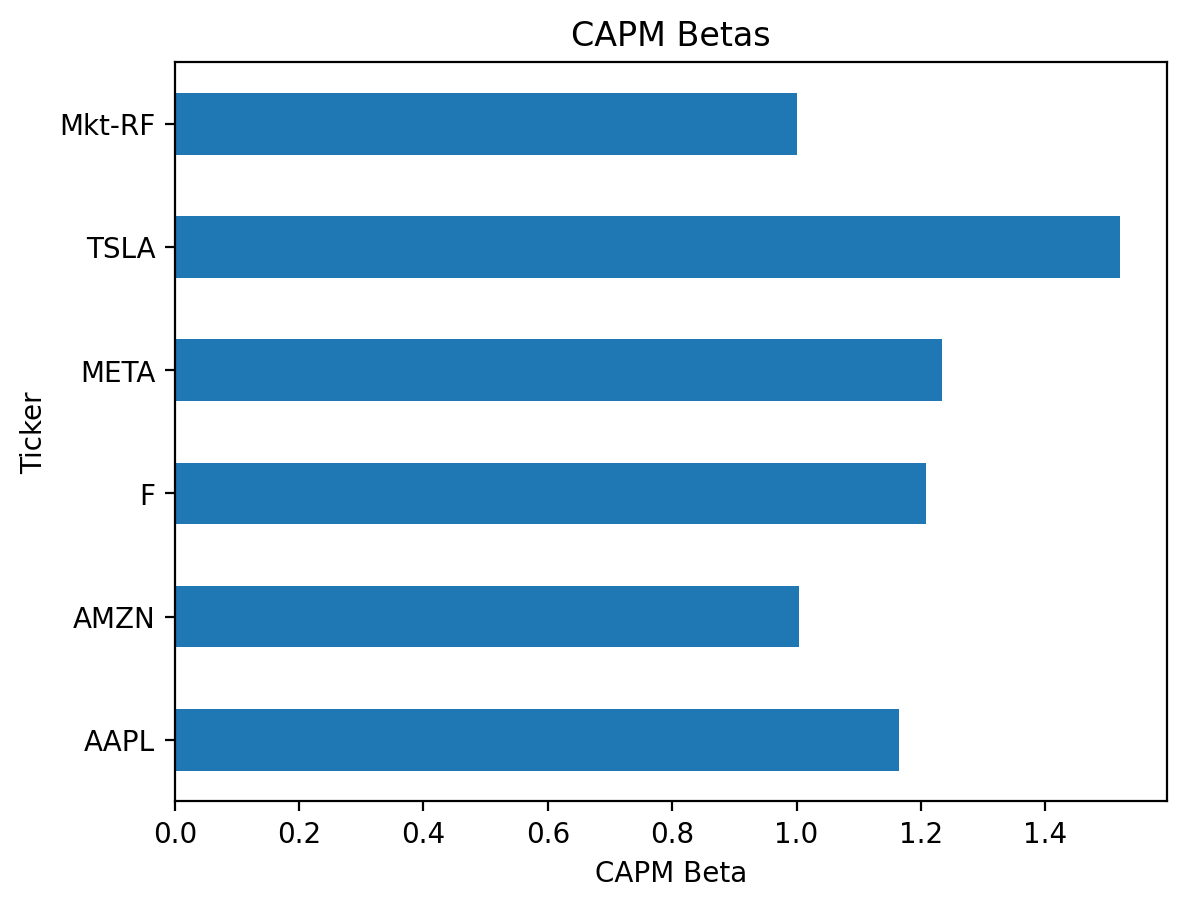

In [32]:
vcv['Mkt-RF'].div(vcv.loc['Mkt-RF', 'Mkt-RF']).plot(kind='barh')
plt.xlabel('CAPM Beta')
plt.title('CAPM Betas')
plt.show()

***Note:***
In a few weeks we will learn the `.apply()` method, which avoids the loop syntax.

In [33]:
returns_2020s.apply(beta)

Ticker
AAPL   1.1649
AMZN   1.0038
F      1.2078
META   1.2337
TSLA   1.5196
dtype: float64

### Calculate the Sharpe Ratio for an *equally weighted* portfolio of these stocks in the 2020s

In [34]:
returns_2020s.mean(axis=1).pipe(sharpe)

0.6439558208816645

The Sharpe Ratio of the portfolio increases because diversification decreases the denominator (risk) more than the numerator (return)!

In [35]:
returns_2020s.apply(sharpe).mean()

0.4267

---
During another class someone asked about the portfolio variance notation from investments class (i.e., $w^T \Sigma w$).
We typically will not use this formula because we can calculate the portfolio return series with `returns.dot(weights)`, then calculate the variance with `.var()`.
Here is a comparison.

In [36]:
_ = returns_2020s.shape[1]
weights = np.ones(_) / _

In [37]:
np.allclose(
    returns_2020s.cov().dot(weights).dot(weights), # from investments class
    returns_2020s.mean(axis=1).var() # from this class
)

True

---

### Calculate the market beta for an *equally weighted* portfolio of these stocks in the 2020s

In [38]:
returns_2020s.mean(axis=1).pipe(beta)

1.2259364816759823

The portfolio beta is the mean of the portfolio stock betas!

In [39]:
returns_2020s.apply(beta).mean()

1.2259

### Calculate the market betas for these stocks every calendar year for every possible year

Save these market betas to data frame `betas`.
Our current Python knowledge limits us to a for-loop, but we will learn easier and faster approaches soon!

In [40]:
betas = []
years = list(range(1973, 2023))
for year in years:
    betas.append(returns.loc[str(year)].apply(beta))
    
betas = pd.DataFrame(betas, index=years)
betas.columns.name = 'Ticker'
betas.index.name = 'Year'
betas.head()

Ticker,AAPL,AMZN,F,META,TSLA
Year,,,,,
1973,NaN,NaN,1.2621,NaN,NaN
1974,NaN,NaN,0.9625,NaN,NaN
1975,NaN,NaN,1.0576,NaN,NaN
1976,NaN,NaN,1.3623,NaN,NaN
1977,NaN,NaN,1.2652,NaN,NaN


### Plot the time series of market betas

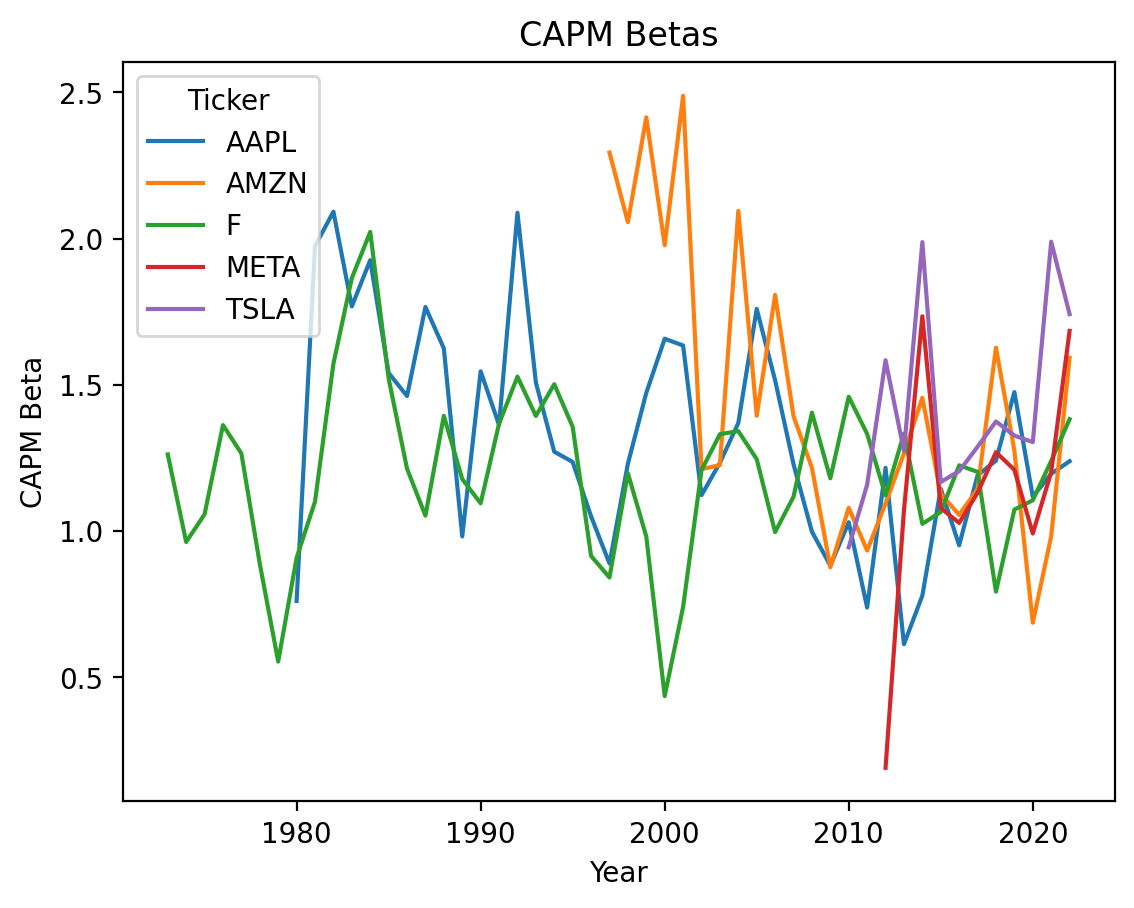

In [41]:
betas.plot()
plt.ylabel('CAPM Beta')
plt.title('CAPM Betas')
plt.show()